In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
#pip install pygraphviz
#import pygraphviz

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
Deals

In [3]:
%%bigquery --project bcx-insights customers_3 --verbose

SELECT *

FROM `bcx-insights.telkom_customerexperience.orders_20190926_00_anon`

WHERE DEAL_DESC = 'SmartBroadband Wireless 20GB Deal'

ORDER BY ORDER_CREATION_DATE, ACTION_CREATION_DATE, ORDER_ID_ANON

Executing query with job ID: fe3399f5-de86-415f-b347-d0159796229f
Query executing: 0.32s
Query complete after 0.49s


In [4]:
customers_3.tail(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON
73963,Done,2019-09-18 21:13:41+00:00,Done,PR,Provide,2019-09-18 21:13:41+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:14:07+00:00,2019-09-18 21:14:07+00:00,C,NGN,-5452963134605644357,3553008416154642013,-8780630124271807595,-3154332177942909412
73964,Done,2019-09-18 21:16:56+00:00,Done,PR,Provide,2019-09-18 21:16:56+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:17:22+00:00,2019-09-18 21:17:22+00:00,C,NGN,-3861971997209067679,3553008416154642013,-468472096676769145,1785951227348079728
73965,Done,2019-09-18 21:17:45+00:00,Done,PR,Provide,2019-09-18 21:17:45+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:18:07+00:00,2019-09-18 21:18:07+00:00,C,NGN,4213499607793677342,3553008416154642013,-5579602106860421269,393783649302723256


In [5]:
len(customers_3)

73966

In [6]:
customers_3 = customers_3.drop_duplicates()

In [7]:
len(customers_3)

63952

In [8]:
customers_3['MSISDN_ANON'] = customers_3['MSISDN_ANON'].astype(str)

In [9]:
unique_col = 'ORDER_ID_ANON'

In [10]:
customers_3['stage'] = customers_3.groupby(unique_col).cumcount()+1

In [11]:
final_stage = customers_3[[unique_col,'stage']].groupby(unique_col).max()

In [12]:
final_stage.rename(columns={'stage':'final_stage'}, inplace=True)

In [13]:
final_stage.head()

,final_stage
ORDER_ID_ANON,
-9223306823366734784,1
-9223248441393030756,1
-9222347154752454613,1
-9222075819255811725,1
-9222039762059565940,1


In [14]:
customers_3 = pd.merge(customers_3, final_stage, on=unique_col, how='outer')

In [15]:
customers_3.head()

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,CLOSE_DATE,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,stage,final_stage
0,Done,2018-09-20 16:46:20+00:00,Done,CH,Change,2018-09-20 16:46:20+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2018-09-20 23:59:59+00:00,2018-09-20 23:59:59+00:00,C,NGN,1262531845954188141,7252513058952677604,5666251268902769263,6229972298034901282,1,1
1,Done,2018-10-17 11:48:32+00:00,Done,CH,Change,2018-10-17 11:48:32+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-08-15 12:32:33+00:00,2019-08-15 12:32:33+00:00,C,NGN,-482075070549088861,-7587121800342134500,8185052302715170191,-9049212440462464679,1,1
2,Done,2018-10-18 12:09:33+00:00,Done,PR,Provide,2018-10-18 12:09:33+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-04-06 22:57:08+00:00,2019-04-06 22:57:08+00:00,C,NGN,-7802037258646629564,7920278879050368577,-1243894680404079581,5786103801477885480,1,1
3,Done,2018-12-05 16:43:40+00:00,Done,CH,Change,2018-12-05 16:43:40+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-04-02 09:18:18+00:00,2019-04-02 09:18:18+00:00,C,NGN,-4099094970671294260,-963488803382407659,6025134030037162457,6847133454232108262,1,1
4,Done,2018-12-07 10:42:06+00:00,Done,CH,Change,2018-12-07 10:42:06+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-07-12 18:26:06+00:00,2019-07-12 18:26:06+00:00,C,NGN,-7775047913392835689,3133663247904931664,-2010456116961845379,2674809212118753695,1,1


In [16]:
customers_3['stage'] = customers_3['stage'].astype(str)

In [17]:
customers_3['ActionType_OrderStatus'] = customers_3['ACTION_TYPE_DESC'] +' * '+ customers_3['ORDER_STATUS_DESC'] 

In [18]:
type_status = list(customers_3['ActionType_OrderStatus'].unique())

In [19]:
customers_3['stage_ActionType_OrderStatus'] = customers_3['stage'] +') * '+ customers_3['ACTION_TYPE_DESC'] +' * '+ customers_3['ORDER_STATUS_DESC'] 

In [20]:
customers_3.tail(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,stage,final_stage,ActionType_OrderStatus,stage_ActionType_OrderStatus
63949,Done,2019-09-18 21:13:41+00:00,Done,PR,Provide,2019-09-18 21:13:41+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:14:07+00:00,...,C,NGN,-5452963134605644357,3553008416154642013,-8780630124271807595,-3154332177942909412,1,1,Provide * Done,1) * Provide * Done
63950,Done,2019-09-18 21:16:56+00:00,Done,PR,Provide,2019-09-18 21:16:56+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:17:22+00:00,...,C,NGN,-3861971997209067679,3553008416154642013,-468472096676769145,1785951227348079728,1,1,Provide * Done,1) * Provide * Done
63951,Done,2019-09-18 21:17:45+00:00,Done,PR,Provide,2019-09-18 21:17:45+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-09-18 21:18:07+00:00,...,C,NGN,4213499607793677342,3553008416154642013,-5579602106860421269,393783649302723256,1,1,Provide * Done,1) * Provide * Done


In [21]:
customers = list(customers_3[unique_col].unique())

In [22]:
sorted_df = customers_3.sort_values('stage', ascending=False)
sorted_df.head(3)

,ORDER_STATUS_DESC,ORDER_CREATION_DATE,ACTION_STATUS_DESC,ACTION_TYPE,ACTION_TYPE_DESC,ACTION_CREATION_DATE,ORIGINAL_SALES_CHANNEL_DESC,CURRENT_SALES_CHANNEL_DESC,DEAL_DESC,PROV_DATE,...,OPEN_CLOSE_INDIC,SOURCE,ORDER_ID_ANON,ACCOUNT_NO_ANON,MSISDN_ANON,ORDER_ACTION_ID_ANON,stage,final_stage,ActionType_OrderStatus,stage_ActionType_OrderStatus
21608,Done,2019-07-06 11:04:43+00:00,Done,PR,Provide,2019-07-06 11:04:43+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-07-06 11:40:33+00:00,...,C,NGN,534054793263945555,1612443932842656633,4103364350320324992,-7082338567608815847,7,7,Provide * Done,7) * Provide * Done
21607,Done,2019-07-06 11:04:43+00:00,Done,PR,Provide,2019-07-06 11:04:43+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-07-06 11:40:33+00:00,...,C,NGN,534054793263945555,1612443932842656633,7318006168441282118,-2975044637407197719,6,7,Provide * Done,6) * Provide * Done
41874,Done,2019-08-14 14:15:45+00:00,Done,PR,Provide,2019-08-14 14:15:45+00:00,Call Center,Call Center,SmartBroadband Wireless 20GB Deal,2019-08-16 14:40:38+00:00,...,C,NGN,5834177311676859304,-4490557944858168522,-8818064735780512688,494801825042585798,6,6,Provide * Done,6) * Provide * Done


In [23]:
len(customers_3[customers_3['stage']=='2'])

90

In [24]:
len(customers)

63811

In [25]:
# Create a networkx graph object
J = nx.Graph()

In [26]:
J.clear()

In [27]:
max_stage=max(customers_3['stage'].astype(int))
max_stage

7

In [28]:
actions = list(customers_3['stage_ActionType_OrderStatus'].unique())

In [29]:
J.add_node('DEAL',posi=(0,10), color = 'purple')

In [30]:
for i in range(1,max_stage+1):
  
  stage_actions = list(customers_3[customers_3['stage']==str(i)]['stage_ActionType_OrderStatus'].unique())
  #print(stage_actions)
  for k in range(len(stage_actions)):
    label = stage_actions[k]
    #print(label)
    label = label.split('* ',1)
    label = label[1]
    #print(label)
    height =  type_status.index(label) +1
    #print(height)
    J.add_node(stage_actions[k],posi=(i*1.25,height))
    #print(stage_actions[k])
    #print((i,k+1))

In [31]:
J.nodes(data = True)

NodeDataView({'2) * Change * Done': {'posi': (2.5, 1)}, '2) * Change Ownership * Done': {'posi': (2.5, 8)}, '1) * Change Part of Replace Offer * Done': {'posi': (1.25, 6)}, '1) * Cease * Negotiation': {'posi': (1.25, 19)}, '2) * Cease * Done': {'posi': (2.5, 3)}, '1) * Change Part of Replace Offer * Completion': {'posi': (1.25, 20)}, '1) * Change * Negotiation': {'posi': (1.25, 16)}, '1) * Change * Done': {'posi': (1.25, 1)}, '1) * Change Ownership * Negotiation': {'posi': (1.25, 15)}, '1) * Provide * Delivery': {'posi': (1.25, 4)}, '1) * Provide * Negotiation': {'posi': (1.25, 11)}, '3) * Cease * Done': {'posi': (3.75, 3)}, '1) * Change Part of Replace Offer * Initial': {'posi': (1.25, 13)}, '1) * Cease * Done': {'posi': (1.25, 3)}, '1) * Change * Delivery': {'posi': (1.25, 5)}, '3) * Provide * Negotiation': {'posi': (3.75, 11)}, '1) * Collection Resume * Done': {'posi': (1.25, 9)}, 'DEAL': {'posi': (0, 10), 'color': 'purple'}, '1) * Provide * Done': {'posi': (1.25, 2)}, '2) * Provide

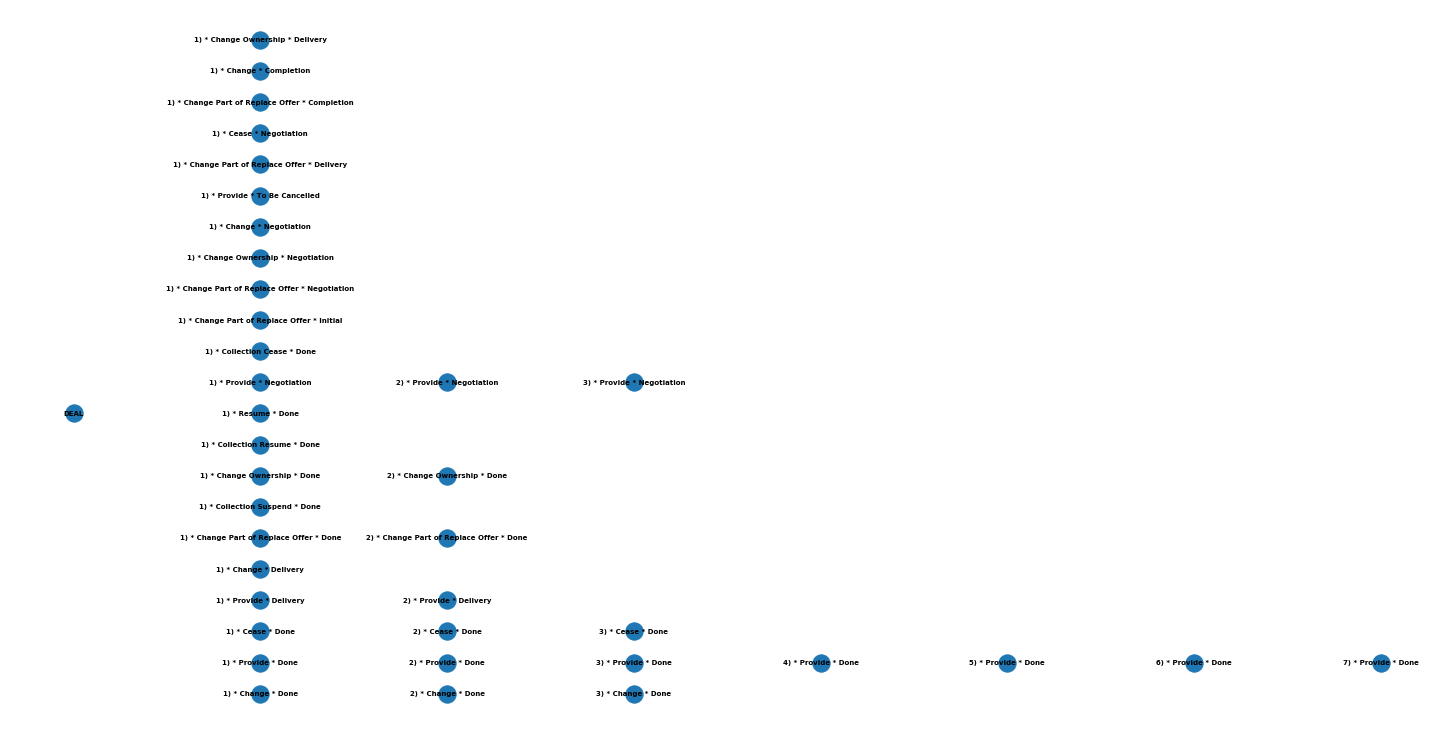

In [32]:
# Draw the resulting graph
pos = nx.get_node_attributes(J,'posi')
nx.draw(J, pos ,with_labels=True, font_weight='bold', font_size = 7)
plt.show()

In [33]:
# clear edges
J.remove_edges_from(list(J.edges()))

In [34]:
#create edges with data (count, minutes, ave_minutes)

date_col = customers_3.columns.get_loc('ACTION_CREATION_DATE')

for c in customers:

    temp_df = customers_3[customers_3[unique_col] == c]
  
    for i in range(len(temp_df)-1):
        #print(i, c)
        if J.has_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1]) == False:
            #print(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
            #print(temp_df.iloc[i,-4], temp_df.iloc[(i+1),-4])
            J.add_edge(temp_df.iloc[i, -1], temp_df.iloc[(i+1),-1])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = 1
            difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['minutes'] = round(difference.total_seconds()/(60),1)
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_minutes'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['minutes']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)
            
            if J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_minutes'] >1:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'red'
            else:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'green'

        else:
            current_count = J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count']
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'] = current_count + 1

            current_minutes =  J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['minutes']
            difference = (temp_df.iloc[(i+1),date_col]-temp_df.iloc[i, date_col])
            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['minutes'] = round(current_minutes + difference.total_seconds()/(60),1)

            J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_minutes'] = round(J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['minutes']/ J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['count'],1)
            
            if J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['ave_minutes'] >1:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'red'
            else:
                J.edges[temp_df.iloc[i, -1],temp_df.iloc[(i+1),-1]]['color'] = 'green'


In [35]:
# add edge weight attribute

all_counts = []

#Iterate through the graph edges to gather all the weights
for (node1,node2,data) in J.edges(data=True):
    all_counts.append(data['count']) 

    
total_count = sum(all_counts)
max_count = max(all_counts)
min_count = min(all_counts)

print(max_count/total_count)
print(min_count/total_count)


for (node1,node2,data) in J.edges(data=True):
    J.edges[node1,node2]['weight'] = round(J.edges[node1,node2]['count']*max_count*1/total_count,1)
    

0.48226950354609927
0.0070921985815602835


In [36]:
J.edges(data=True)

EdgeDataView([('2) * Change * Done', '1) * Change * Done', {'weight': 0.5, 'count': 1, 'minutes': 0.0, 'ave_minutes': 0.0, 'color': 'green'}), ('2) * Change * Done', '3) * Change * Done', {'weight': 0.5, 'count': 1, 'minutes': 0.0, 'ave_minutes': 0.0, 'color': 'green'}), ('6) * Provide * Done', '7) * Provide * Done', {'weight': 0.5, 'count': 1, 'minutes': 0.0, 'ave_minutes': 0.0, 'color': 'green'}), ('6) * Provide * Done', '5) * Provide * Done', {'weight': 1.9, 'count': 4, 'minutes': 0.0, 'ave_minutes': 0.0, 'color': 'green'}), ('2) * Change Ownership * Done', '1) * Change Ownership * Done', {'weight': 1.0, 'count': 2, 'minutes': 0.0, 'ave_minutes': 0.0, 'color': 'green'}), ('1) * Change Part of Replace Offer * Done', '2) * Change Part of Replace Offer * Done', {'weight': 0.5, 'count': 1, 'minutes': 0.0, 'ave_minutes': 0.0, 'color': 'green'}), ('1) * Provide * Negotiation', '2) * Provide * Negotiation', {'weight': 2.4, 'count': 5, 'minutes': 0.0, 'ave_minutes': 0.0, 'color': 'green'}),

{'2) * Change * Done': (2.5, 1), '2) * Change Ownership * Done': (2.5, 8), '1) * Change Part of Replace Offer * Done': (1.25, 6), '1) * Cease * Negotiation': (1.25, 19), '2) * Cease * Done': (2.5, 3), '1) * Change Part of Replace Offer * Completion': (1.25, 20), '1) * Change * Negotiation': (1.25, 16), '1) * Change * Done': (1.25, 1), '1) * Change Ownership * Negotiation': (1.25, 15), '1) * Provide * Delivery': (1.25, 4), '1) * Provide * Negotiation': (1.25, 11), '3) * Cease * Done': (3.75, 3), '1) * Change Part of Replace Offer * Initial': (1.25, 13), '1) * Cease * Done': (1.25, 3), '1) * Change * Delivery': (1.25, 5), '3) * Provide * Negotiation': (3.75, 11), '1) * Collection Resume * Done': (1.25, 9), 'DEAL': (0, 10), '1) * Provide * Done': (1.25, 2), '2) * Provide * Delivery': (2.5, 4), '1) * Provide * To Be Cancelled': (1.25, 17), '1) * Change Part of Replace Offer * Delivery': (1.25, 18), '2) * Change Part of Replace Offer * Done': (2.5, 6), '1) * Change Ownership * Done': (1.25,

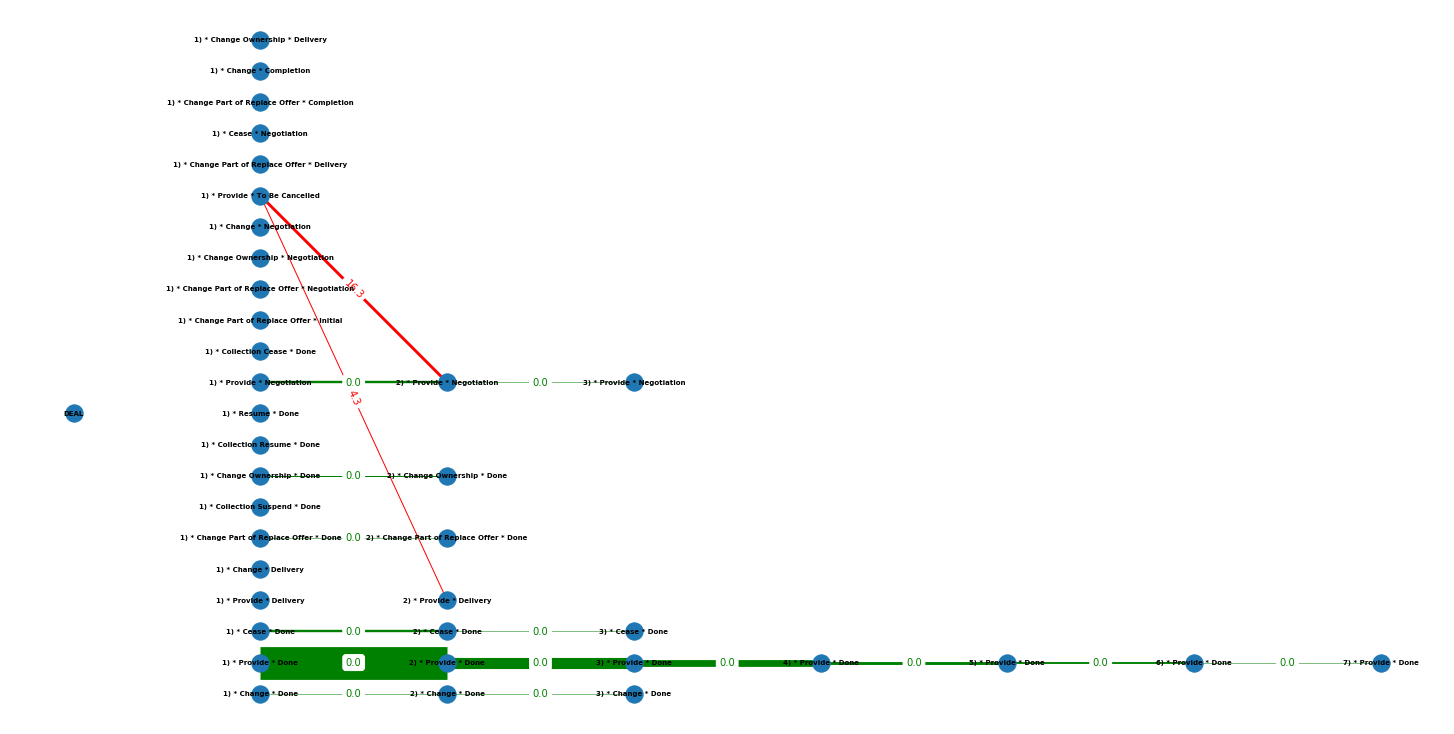

In [37]:
# Draw the resulting graph
#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
edges,colors = zip(*nx.get_edge_attributes(J,'color').items())
edges,width = zip(*nx.get_edge_attributes(J,'weight').items())


nx.draw(J,pos, with_labels=True, font_weight='bold', font_size = 7, edgelist=edges, edge_color=colors, width = width
       )

edge_labels  = nx.get_edge_attributes(J,'ave_minutes')
#label_color  = nx.get_edge_attributes(J,'color').values()

#print(pos)

for e in J.edges(data=True):
    #print(e)
    #print(e[0])
    #print(e[1])
    #print(e[2])
    #print(e[2]['color'])
    nx.draw_networkx_edge_labels(J,pos=pos,edge_labels={(e[0],e[1]):e[2]['ave_minutes']}, font_color = e[2]['color'])

plt.savefig('stage_transition_edge_colour')
plt.show()

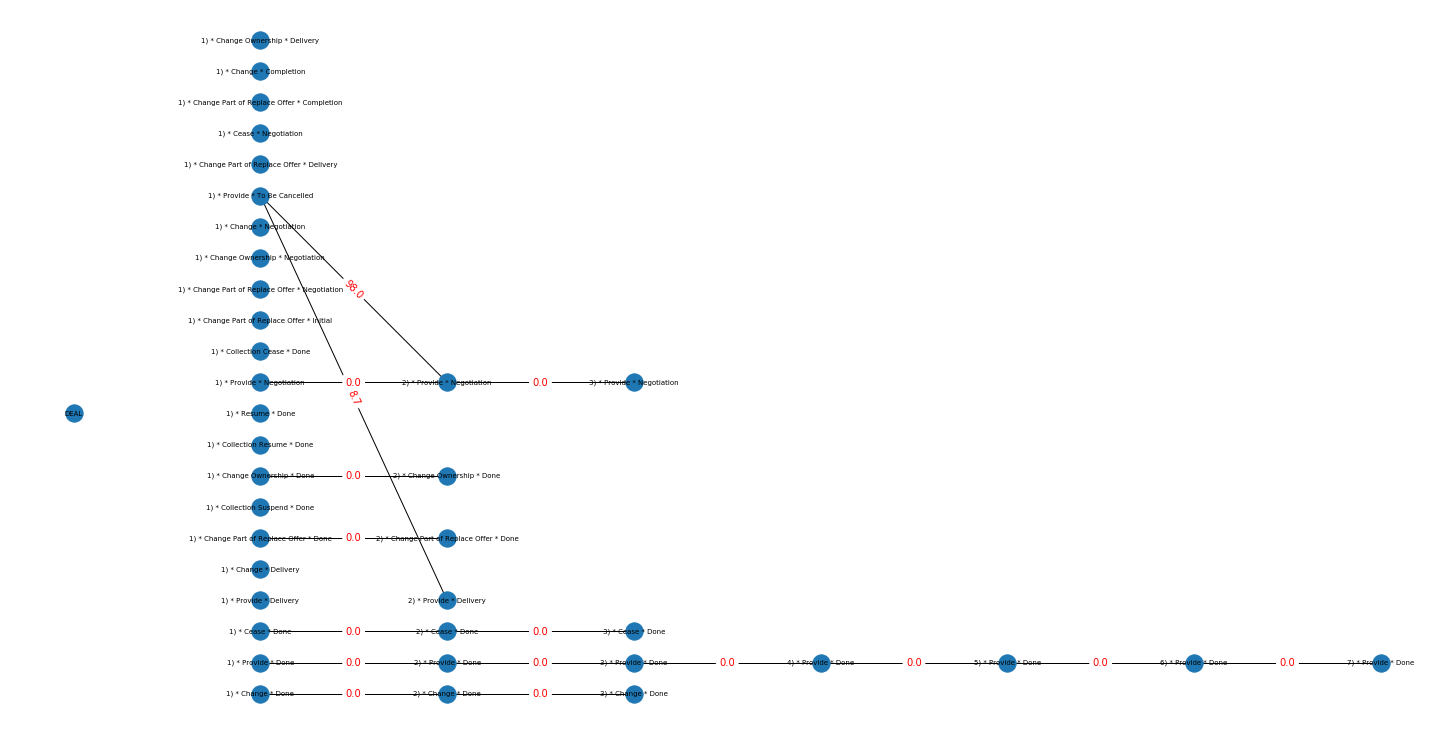

In [38]:
# Draw the resulting graph
#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
nx.draw(J,pos, with_labels=True, font_size = 7
        #, arrowstyle='->',arrowsize=15
       )

edge_labels = nx.get_edge_attributes(J, 'minutes')
nx.draw_networkx_edge_labels(J,pos,edge_labels=edge_labels,font_color='red')

plt.show()

{('1) * Cease * Done', '2) * Cease * Done'): Text(1.875, 3.0, '0.0'),
 ('1) * Change Part of Replace Offer * Done',
  '2) * Change Part of Replace Offer * Done'): Text(1.875, 6.0, '0.0'),
 ('1) * Provide * Done', '2) * Provide * Done'): Text(1.875, 2.0, '0.0'),
 ('1) * Provide * Negotiation',
  '2) * Provide * Negotiation'): Text(1.875, 11.0, '0.0'),
 ('1) * Provide * To Be Cancelled',
  '2) * Provide * Delivery'): Text(1.875, 10.5, '4.3'),
 ('1) * Provide * To Be Cancelled',
  '2) * Provide * Negotiation'): Text(1.875, 14.0, '16.3'),
 ('2) * Change * Done', '1) * Change * Done'): Text(1.875, 1.0, '0.0'),
 ('2) * Change * Done', '3) * Change * Done'): Text(3.125, 1.0, '0.0'),
 ('2) * Change Ownership * Done',
  '1) * Change Ownership * Done'): Text(1.875, 8.0, '0.0'),
 ('3) * Cease * Done', '2) * Cease * Done'): Text(3.125, 3.0, '0.0'),
 ('3) * Provide * Done', '2) * Provide * Done'): Text(3.125, 2.0, '0.0'),
 ('3) * Provide * Done', '4) * Provide * Done'): Text(4.375, 2.0, '0.0'),
 ('

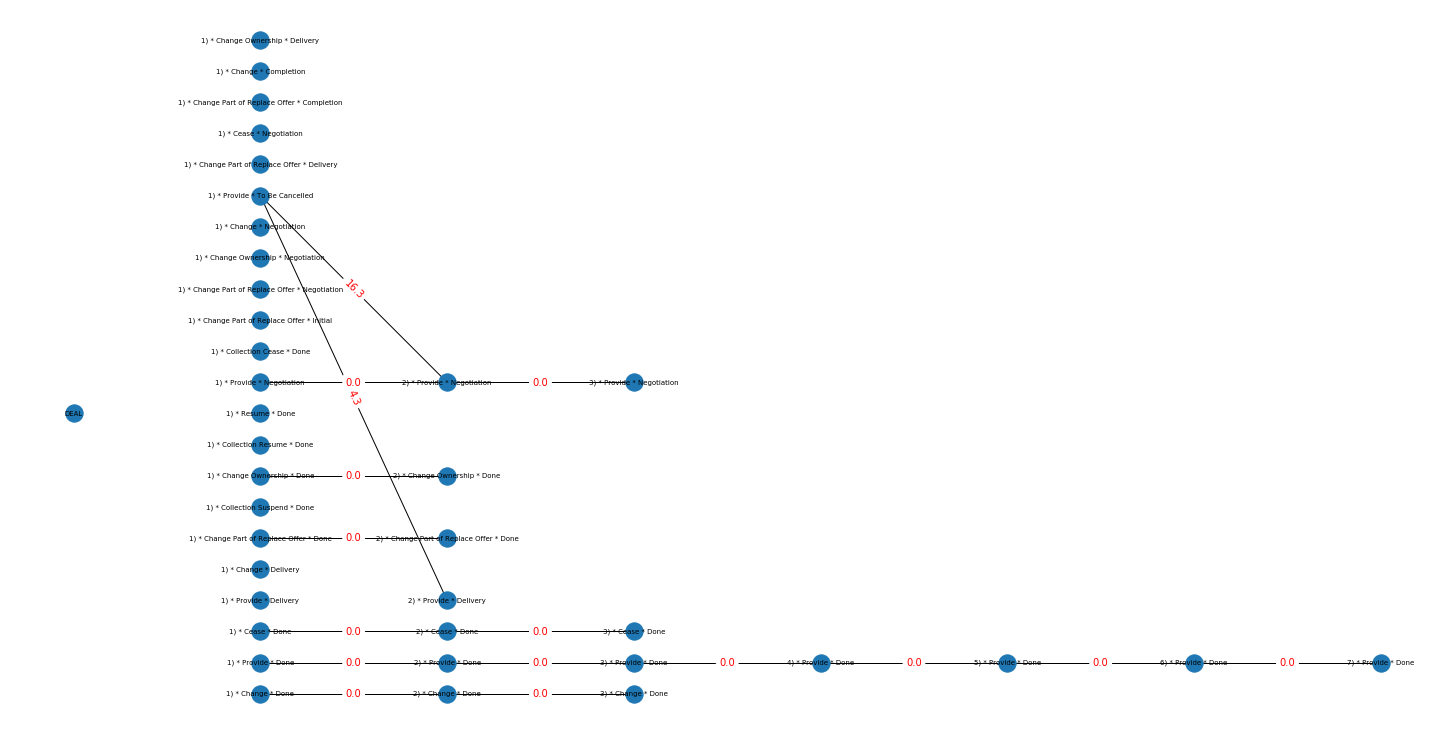

In [39]:
# Draw the resulting graph
#pos = nx.circular_layout(J)

pos = nx.get_node_attributes(J,'posi')
color = nx.get_edge_attributes(J, 'color')

nx.draw(J,pos, with_labels=True, font_size=7
        #, arrowstyle='->',arrowsize=15
       )

edge_labels = nx.get_edge_attributes(J, 'ave_minutes')
nx.draw_networkx_edge_labels(J,pos,edge_labels=edge_labels,font_color='red')

#plt.show()

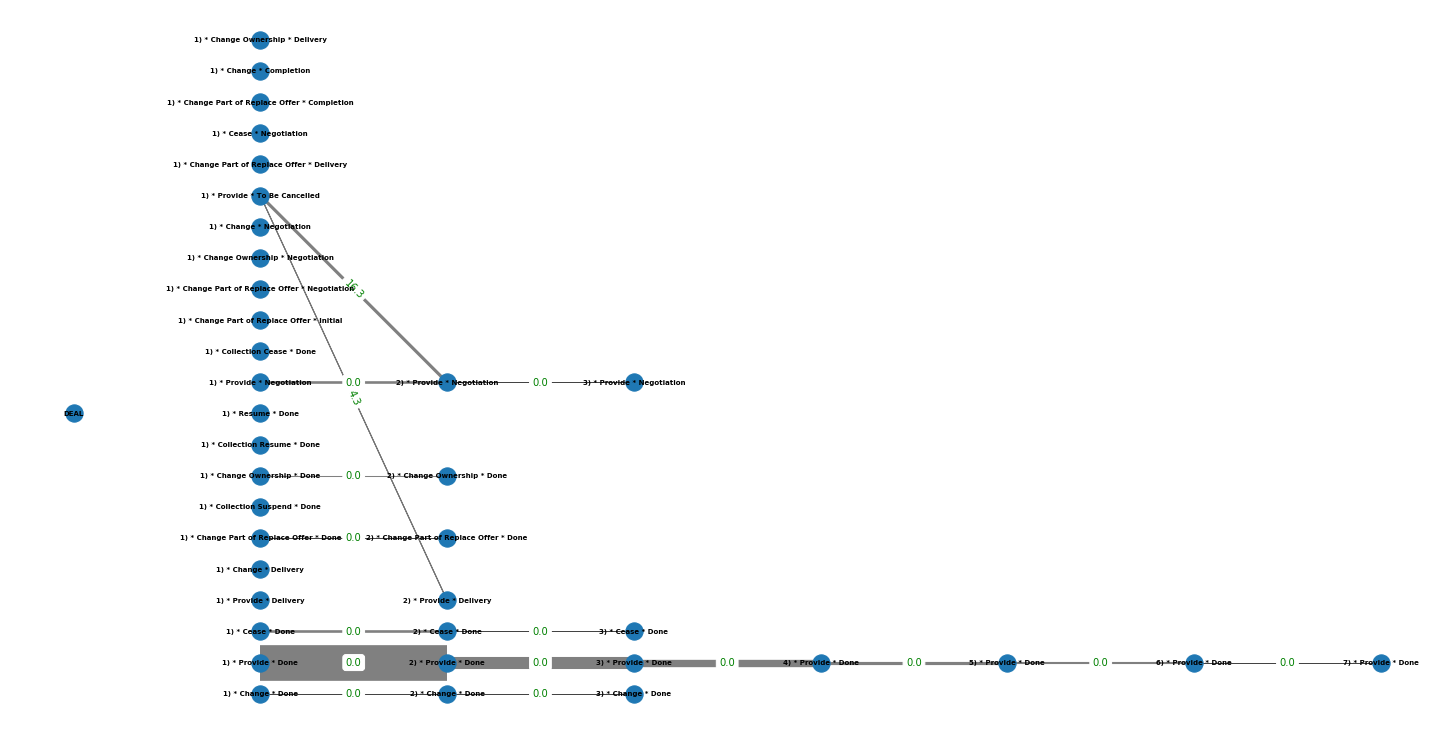

In [40]:
# Draw the resulting graph
#pos = nx.circular_layout(J)
pos = nx.get_node_attributes(J,'posi')
nx.draw(J,pos, with_labels=True, font_weight='bold', font_size = 7)

edge_labels = nx.get_edge_attributes(J, 'ave_minutes')
color = nx.get_edge_attributes(J, 'color')

all_counts = []

#4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in J.edges(data=True):
    all_counts.append(data['count']) #we'll use this when determining edge thickness

#4 b. Get unique weights
unique_counts = list(set(all_counts))
 
#4 c. Plot the edges - one by one!
for count in unique_counts:
        #4 d. Form a filtered list with just the weight you want to draw
        counted_edges = [(node1,node2) for (node1,node2,edge_attr) in J.edges(data=True) if edge_attr['count']==count]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = count*len(actions)*2/sum(all_counts)
        nx.draw_networkx_edges(J,pos,edgelist=counted_edges,width=width, edge_color = 'grey')

nx.draw_networkx_edge_labels(J,pos,edge_labels=edge_labels,font_color='green')
plt.savefig('stage_transition')
plt.show()

In [41]:
J_df = nx.to_pandas_edgelist(J)

In [42]:
J_df

,ave_minutes,color,count,minutes,source,target,weight
0,0.0,green,1,0.0,2) * Change * Done,1) * Change * Done,0.5
1,0.0,green,1,0.0,2) * Change * Done,3) * Change * Done,0.5
2,0.0,green,1,0.0,6) * Provide * Done,7) * Provide * Done,0.5
3,0.0,green,4,0.0,6) * Provide * Done,5) * Provide * Done,1.9
4,0.0,green,2,0.0,2) * Change Ownership * Done,1) * Change Ownership * Done,1.0
5,0.0,green,1,0.0,1) * Change Part of Replace Offer * Done,2) * Change Part of Replace Offer * Done,0.5
6,0.0,green,5,0.0,1) * Provide * Negotiation,2) * Provide * Negotiation,2.4
7,0.0,green,1,0.0,3) * Cease * Done,2) * Cease * Done,0.5
8,0.0,green,5,0.0,1) * Cease * Done,2) * Cease * Done,2.4
9,0.0,green,1,0.0,3) * Provide * Negotiation,2) * Provide * Negotiation,0.5


In [43]:
CJ = J

In [44]:
CJ.remove_nodes_from(list(nx.isolates(J)))

In [45]:
CJ.nodes(data=True)

NodeDataView({'2) * Change * Done': {'posi': (2.5, 1)}, '2) * Provide * Delivery': {'posi': (2.5, 4)}, '1) * Change * Done': {'posi': (1.25, 1)}, '2) * Provide * Negotiation': {'posi': (2.5, 11)}, '1) * Provide * Negotiation': {'posi': (1.25, 11)}, '3) * Cease * Done': {'posi': (3.75, 3)}, '2) * Change Ownership * Done': {'posi': (2.5, 8)}, '1) * Cease * Done': {'posi': (1.25, 3)}, '6) * Provide * Done': {'posi': (7.5, 2)}, '3) * Provide * Negotiation': {'posi': (3.75, 11)}, '4) * Provide * Done': {'posi': (5.0, 2)}, '1) * Provide * Done': {'posi': (1.25, 2)}, '1) * Provide * To Be Cancelled': {'posi': (1.25, 17)}, '1) * Change Part of Replace Offer * Done': {'posi': (1.25, 6)}, '2) * Change Part of Replace Offer * Done': {'posi': (2.5, 6)}, '1) * Change Ownership * Done': {'posi': (1.25, 8)}, '3) * Provide * Done': {'posi': (3.75, 2)}, '2) * Cease * Done': {'posi': (2.5, 3)}, '3) * Change * Done': {'posi': (3.75, 1)}, '7) * Provide * Done': {'posi': (8.75, 2)}, '2) * Provide * Done': 

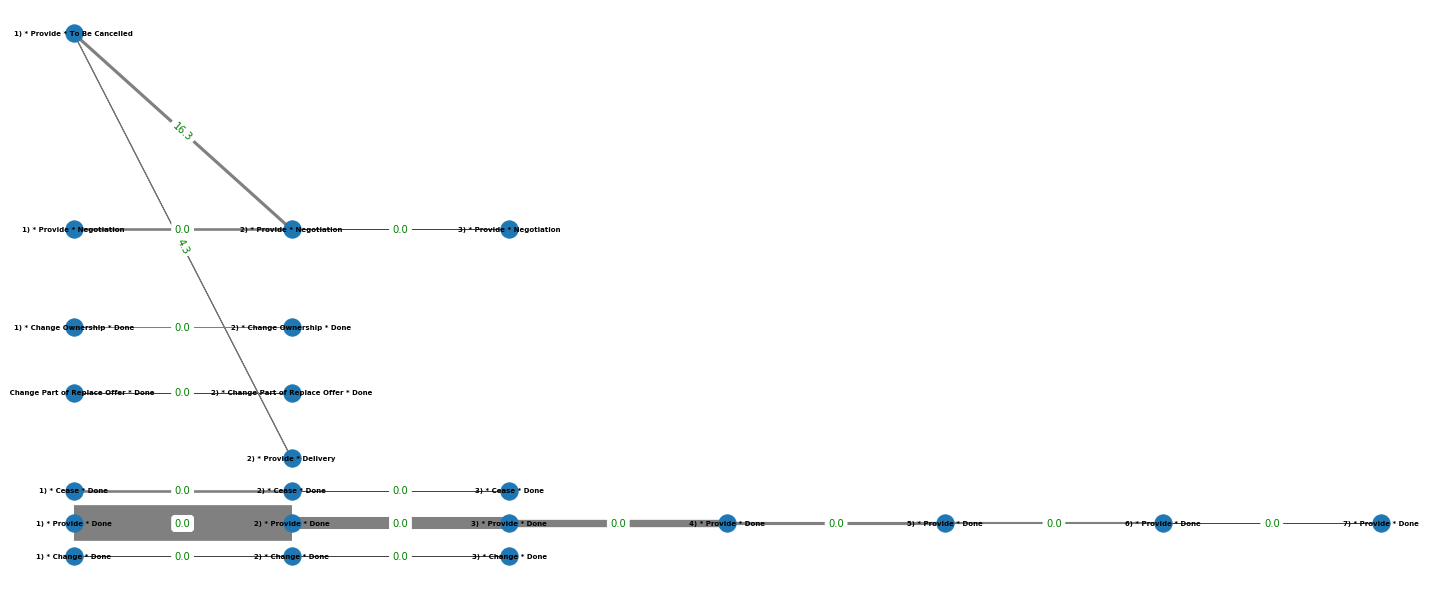

In [46]:
#CJ.add_node('dummy',posi=(0,10))

# Draw the resulting graph

plt.rcParams['figure.figsize'] = [20, 8]

pos = nx.get_node_attributes(CJ,'posi')
nx.draw(CJ,pos, with_labels=True, font_weight='bold', font_size = 7)

edge_labels = nx.get_edge_attributes(CJ, 'ave_minutes')

all_counts = []
#4 a. Iterate through the graph nodes to gather all the weights
for (node1,node2,data) in CJ.edges(data=True):
    all_counts.append(data['count']) #we'll use this when determining edge thickness

#4 b. Get unique weights
unique_counts = list(set(all_counts))
 
#4 c. Plot the edges - one by one!
for count in unique_counts:
        #4 d. Form a filtered list with CJust the weight you want to draw
        counted_edges = [(node1,node2) for (node1,node2,edge_attr) in CJ.edges(data=True) if edge_attr['count']==count]
        #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
        width = count*len(actions)*2/sum(all_counts)
        nx.draw_networkx_edges(CJ,pos,edgelist=counted_edges,width=width, edge_color = 'grey')

nx.draw_networkx_edge_labels(CJ,pos,edge_labels=edge_labels,font_color='green')
plt.savefig('stage_transition_onlymulti')
plt.show()

In [47]:
#a = nx.nx_agraph.graphviz_layout(J)
#b = nx.readwrite.json_graph.cytoscape_data(J)